In [9]:
from google.colab import drive

# This will prompt for authorization.
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [10]:
!ls "/content/drive/My Drive"

 333259944-Antenna-Theory-by-Balanis-Solution-Manual-3rd-Edition.pdf
 CNN.wts.h5
'Colab Notebooks'
'Getting started.pdf'
 raw_SNR.npy
 RML2016.10a_dict.pkl
 RML2016.10b.dat


In [0]:
import os
import pickle
os.environ["KERAS_BACKEND"] = "tensorflow"
import numpy as np
from keras.layers.core import Reshape, Dense, Dropout, Activation, Flatten
from keras.layers.convolutional import Conv2D, MaxPooling2D, ZeroPadding2D
import matplotlib.pyplot as plt
import pickle, keras
from keras.models import Model
from keras.layers import Input, LSTM, Dense
import sys
sys.path.append('../confusion')
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix
from sklearn.metrics import cohen_kappa_score, accuracy_score

name = 'lstm'



In [0]:
#Xd = pickle.load(open("/content/drive/My Drive/RML2016.10a_dict.pkl", 'rb'))
filename = "/content/drive/My Drive/RML2016.10a_dict.pkl"
open_file = open(filename,'rb')
Xd= pickle.load(open_file, encoding='latin1')
snrs, mods = map(lambda j: sorted(list(set(map(lambda x: x[j], Xd.keys())))), [1, 0])
X = []
lbl = []
for mod in mods:
    for snr in snrs:
        X.append(Xd[(mod, snr)])
        for i in range(Xd[(mod, snr)].shape[0]):  lbl.append((mod, snr))
X = np.vstack(X)
# %%
np.random.seed(2016) 
n_examples = X.shape[0]
n_train = n_examples * 0.5  
train_idx = np.random.choice(range(0, n_examples), size=int(n_train), replace=False)
test_idx = list(set(range(0, n_examples)) - set(train_idx))  
X_train = X[train_idx]
X_test = X[test_idx]


def to_onehot(yy):
    yy1 = np.zeros([len(yy), max(yy) + 1])
    yy1[np.arange(len(yy)), yy] = 1
    return yy1


In [14]:
trainy = list(map(lambda x: mods.index(lbl[x][0]), train_idx))
Y_train = to_onehot(trainy)
Y_test = to_onehot(list(map(lambda x: mods.index(lbl[x][0]), test_idx)))
# in_shp: <type 'list'>: [2, 128]
in_shp = list(X_train.shape[1:])
print (X_train.shape, in_shp)
classes = mods
# %%
dr = 0.5  
input_x = Input(shape=(1, 2, 128))

 

input_x_padding = ZeroPadding2D((0, 2), data_format="channels_first")(input_x)

layer11 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv11", init='glorot_uniform',
                 data_format="channels_first")(input_x_padding)
layer11 = Dropout(dr)(layer11)

layer11_padding = ZeroPadding2D((0, 2), data_format="channels_first")(layer11)
layer12 = Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv12", init='glorot_uniform',
                 data_format="channels_first")(layer11_padding)
layer12 = Dropout(dr)(layer12)

layer12 = ZeroPadding2D((0, 2), data_format="channels_first")(layer12)
layer13 = Conv2D(50, (1, 8), padding='valid', activation="relu", name="conv13", init='glorot_uniform',
                 data_format="channels_first")(layer12)
layer13 = Dropout(dr)(layer13)

# <type 'tuple'>: (None, 50, 2, 242),
concat = keras.layers.concatenate([layer11, layer13])
concat_size = list(np.shape(concat))
input_dim = int(concat_size[-1] * concat_size[-2])
timesteps = int(concat_size[-3])
# concat = np.reshape(concat, (-1,timesteps,input_dim))
concat = Reshape((timesteps, input_dim))(concat)
lstm_out = LSTM(50, input_dim=input_dim, input_length=timesteps)(concat)

# lstm_out = LSTM(250, input_dim=input_dim, input_length=timesteps)(concat)

# layer_Flatten = Flatten()(lstm_out)
layer_dense1 = Dense(256, activation='relu', init='he_normal', name="dense1")(lstm_out)
layer_dropout = Dropout(dr)(layer_dense1)
layer_dense2 = Dense(len(classes), init='he_normal', name="dense2")(layer_dropout)
layer_softmax = Activation('softmax')(layer_dense2)
output = Reshape([len(classes)])(layer_softmax)

model = Model(inputs=input_x, outputs=output)

model.compile(loss='categorical_crossentropy', optimizer='adam')
model.summary()

(110000, 2, 128) [2, 128]






/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:22: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv11", data_format="channels_first", kernel_initializer="glorot_uniform")`






Instructions for updating:
Please use `rate` instead of `keep_prob`. Rate should be set to `rate = 1 - keep_prob`.


/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:27: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv12", data_format="channels_first", kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:32: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(50, (1, 8), padding="valid", activation="relu", name="conv13", data_format="channels_first", kernel_initializer="glorot_uniform")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: The `input_dim` and `input_length` arguments in recurrent layers are deprecated. Use `input_shape` instead.
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:43: UserWarning: Update your `LSTM` call to the Keras 2 API: `LSTM(50, input_shape=(50, 488))`





Model: "model_1"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_2 (InputLayer)            (None, 1, 2, 128)    0                                            
__________________________________________________________________________________________________
zero_padding2d_1 (ZeroPadding2D (None, 1, 2, 132)    0           input_2[0][0]                    
__________________________________________________________________________________________________
conv11 (Conv2D)                 (None, 50, 2, 125)   450         zero_padding2d_1[0][0]           
__________________________________________________________________________________________________
dropout_1 (Dropout)             (None, 50, 2, 125)   0           conv11[0][0]                     
_________________________________________________________________________________________

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:48: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(256, activation="relu", name="dense1", kernel_initializer="he_normal")`
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:50: UserWarning: Update your `Dense` call to the Keras 2 API: `Dense(11, name="dense2", kernel_initializer="he_normal")`


Train on 110000 samples, validate on 110000 samples
Epoch 1/2
 - 647s - loss: 2.2876 - val_loss: 2.2057
Epoch 2/2
 - 646s - loss: 2.1849 - val_loss: 2.1308


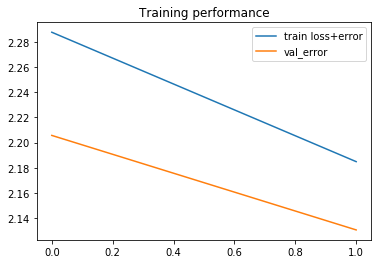

In [16]:
 epochs = 2  # number of epochs to train on
batch_size = 1024  # training batch size default1024
# %%
filepath = "convmodrecnets_%s_0.5.wts.h5" % (name) 

X_train = np.reshape(X_train, (-1, 1, 2, 128))
X_test = np.reshape(X_test, (-1, 1, 2, 128))

history = model.fit(X_train,
                    Y_train,
                    batch_size=batch_size,
                    epochs=epochs,
                    verbose=2,
                    validation_data=(X_test, Y_test),
                    callbacks=[  
                        keras.callbacks.ModelCheckpoint(filepath, monitor='val_loss', verbose=0, save_best_only=True,
                                                        mode='auto'),
                        keras.callbacks.EarlyStopping(monitor='val_loss', patience=5, verbose=0, mode='auto')
                    ])  
# Show loss curves
plt.figure()
plt.title('Training performance')
plt.plot(history.epoch, history.history['loss'], label='train loss+error')
plt.plot(history.epoch, history.history['val_loss'], label='val_error')
plt.legend()
plt.savefig('%s Training performance' %(name))
# plt.show()


# Set up  params




In [17]:
model.load_weights(filepath)
score = model.evaluate(X_test, Y_test, verbose=0, batch_size=batch_size)
print('evaluate_score:', score)


evaluate_score: 2.1307865599632265
